In [2]:
file_path="/content/drive/MyDrive/expression_data_with_labels.csv"

In [3]:
import pandas as pd
df=pd.read_csv(file_path)

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']




#PCA

In [ ]:
# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose desired number of components
pca = PCA(n_components=50)  # you can set it to 50 or 75 as well
X_pca = pca.fit_transform(X_scaled)

# Optional: Check how many components were selected
print(f"Original features: {X.shape[1]}")
print(f"Reduced features after PCA: {X_pca.shape[1]}")

In [ ]:
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total variance retained with 50 components: {explained_variance:.2f}")


Total variance retained with 50 components: 0.99


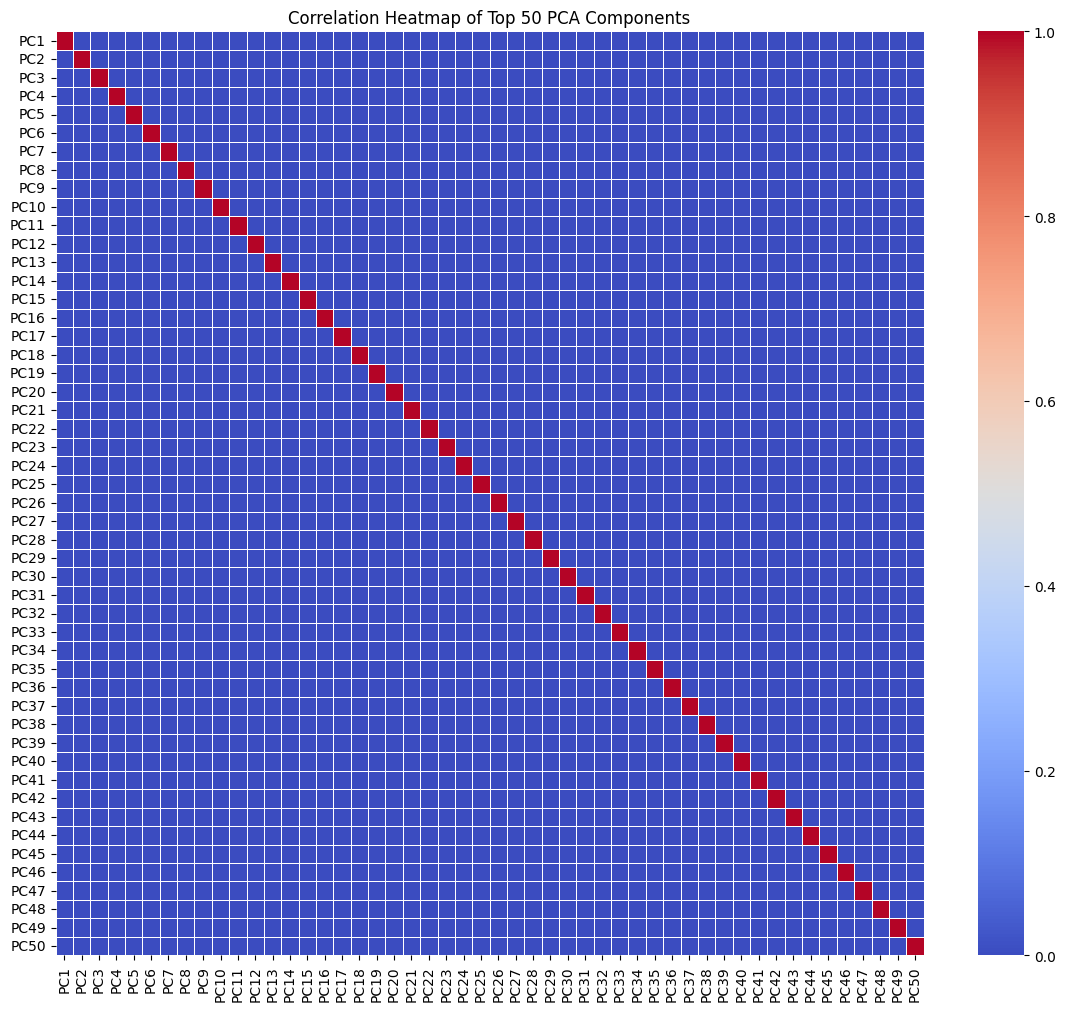

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame for correlation and labeling
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(50)])

# Compute correlation matrix
corr_matrix = pca_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top 50 PCA Components")
plt.show()

# Gene Clustering

In [ ]:
import numpy as np

# X is your gene expression dataframe (samples x genes)
variances = X.var(axis=0)
top_gene_indices = np.argsort(variances)[-250:]  # top 500 variable genes


In [ ]:
from sklearn.cluster import KMeans

# Use top N genes (e.g., based on variance or ANOVA)
X_top_genes = X.iloc[:, top_gene_indices]  # subset to 500-1000 genes

# Apply KMeans clustering on genes (transpose)
X_genes = X_top_genes.T  # now rows = genes
kmeans = KMeans(n_clusters=50, random_state=42)
clusters = kmeans.fit_predict(X_genes)

# Attach cluster labels to gene names
clustered_genes = pd.DataFrame({
    'Gene': X_genes.index,
    'Cluster': clusters
})

# See genes in each cluster
for c in sorted(clustered_genes['Cluster'].unique()):
    print(f"Cluster {c}:")
    print(clustered_genes[clustered_genes['Cluster'] == c]['Gene'].tolist()[:5])  # show top 5


Cluster 0:
['203034_s_at', '200781_s_at', '208695_s_at', '214003_x_at', '211943_x_at']
Cluster 1:
['201859_at', '200748_s_at', 'AFFX-CreX-3_at', '202388_at']
Cluster 2:
['217232_x_at', '209116_x_at', '211696_x_at', '217414_x_at', '211745_x_at']
Cluster 3:
['205863_at', '218454_at']
Cluster 4:
['200088_x_at', '200869_at', '200809_x_at', '202649_x_at', '217740_x_at']
Cluster 5:
['AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-r2-Bs-thr-5_s_at', 'AFFX-r2-Bs-thr-M_s_at']
Cluster 6:
['200741_s_at', '216231_s_at', '211296_x_at', '203107_x_at', '212869_x_at']
Cluster 7:
['211430_s_at']
Cluster 8:
['200010_at', '200019_s_at', '208768_x_at', '214143_x_at', '200002_at']
Cluster 9:
['202018_s_at']
Cluster 10:
['205033_s_at']
Cluster 11:
['221651_x_at', '221671_x_at', '224795_x_at', '214677_x_at']
Cluster 12:
['211983_x_at', '211995_x_at', '201550_x_at', '215157_x_at', '200905_x_at']
Cluster 13:
['201891_s_at', '216438_s_at', '214459_x_at', '215313_x_at', '213828_x_at']
Cluster 14:
['224594_x_at', '2138

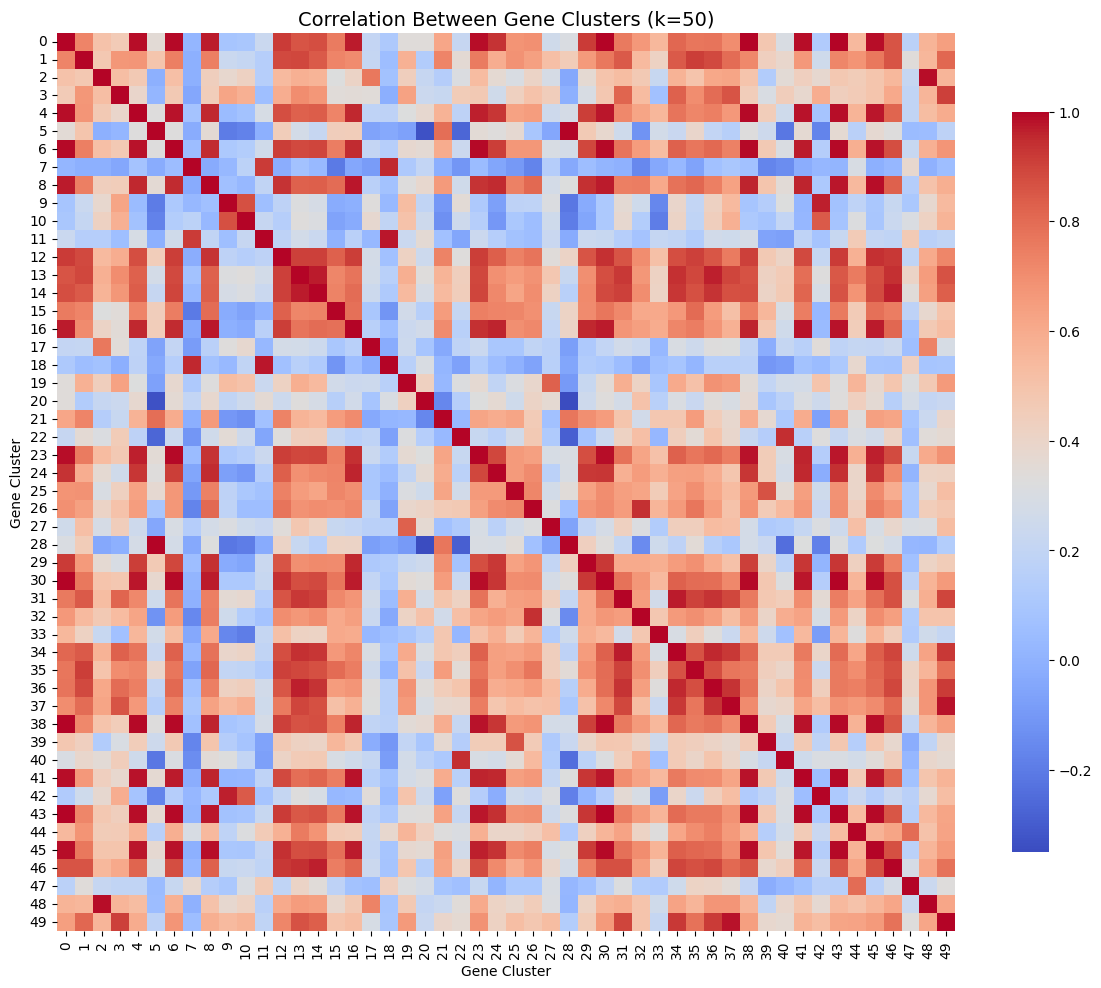

In [ ]:
X_genes['Cluster'] = clusters
cluster_profiles = X_genes.groupby('Cluster').mean()  # shape: (50 clusters, n_samples)

# Step 6: Transpose and compute correlation
cluster_profiles_T = cluster_profiles.T  # shape: (samples, 50 clusters)
cluster_corr = cluster_profiles_T.corr()

# Step 7: Plot heatmap of correlations between clusters
plt.figure(figsize=(12, 10))
sns.heatmap(cluster_corr, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Between Gene Clusters (k=50)", fontsize=14)
plt.xlabel("Gene Cluster")
plt.ylabel("Gene Cluster")
plt.tight_layout()
plt.show()

#Select K Best

Selected genes: ['1563283_at', '1566086_at', '1567627_at', '200908_s_at', '200966_x_at', '201041_s_at', '201105_at', '201315_x_at', '201858_s_at', '202015_x_at', '202028_s_at', '202917_s_at', '203535_at', '205119_s_at', '208659_at', '208755_x_at', '209189_at', '209836_x_at', '211076_x_at', '211296_x_at', '211940_x_at', '212044_s_at', '212203_x_at', '212581_x_at', '212788_x_at', '212952_at', '213350_at', '213453_x_at', '213642_at', '213757_at', '213828_x_at', '214370_at', '214687_x_at', '216246_at', '216565_x_at', '217398_x_at', '217728_at', '217733_s_at', '218157_x_at', '221943_x_at', '224549_x_at', '226235_at', '228746_s_at', '229120_s_at', '229420_at', '234562_x_at', '238389_s_at', '240567_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HUMRGE/M10098_3_at']


<Axes: >

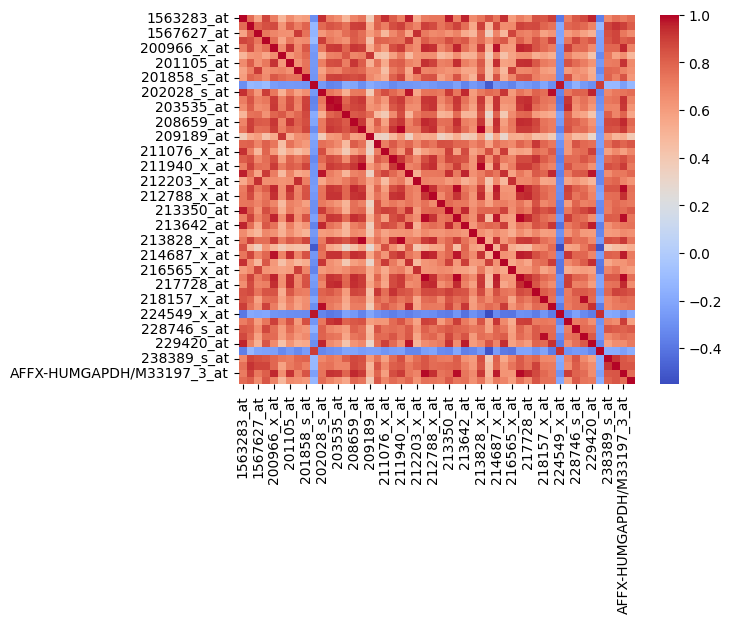

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
selector = SelectKBest(score_func=f_classif, k=50)
X_kbest_50 = selector.fit_transform(X, y)
top_gene_indices = selector.get_support(indices=True)
selected_gene_names = X.columns[top_gene_indices]

print("Selected genes:", selected_gene_names.tolist())

sns.heatmap(pd.DataFrame(X_kbest_50, columns=selected_gene_names).corr(), cmap='coolwarm')


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# MI-based feature selection
selector_mi = SelectKBest(score_func=mutual_info_classif, k=50)
X_top_50_mi = selector_mi.fit_transform(X, y)

# Get selected gene names
selected_genes_mi = X.columns[selector_mi.get_support()]


<Axes: >

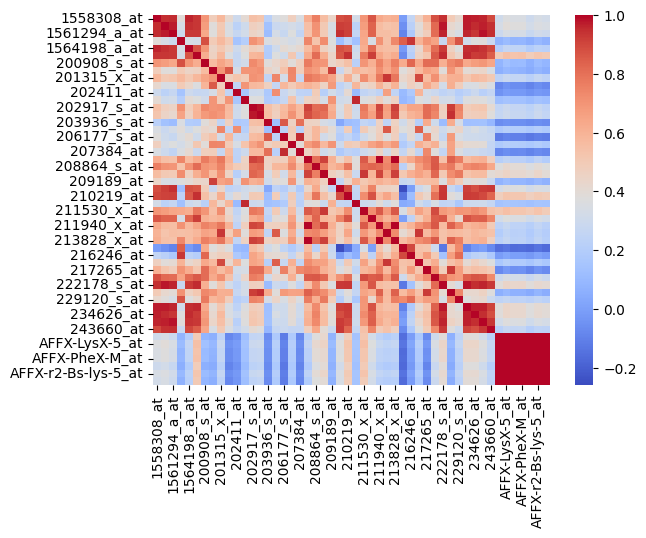

In [ ]:
sns.heatmap(pd.DataFrame(X_top_50_mi, columns=selected_genes_mi).corr(), cmap='coolwarm')
